# Bank Customer Churn Prediction - Complete Project

# Requirements Setup

In [1]:
# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data Import

In [2]:
# Load the dataset
df=pd.read_csv("/content/drive/MyDrive/Bank_Churn.csv")
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# shape of the data
print(f"The data has {df.shape[0]} rows and {df.shape[1]} columns")

The data has 10000 rows and 13 columns


# Fundamental Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [5]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# checking for missing values
df.isnull().sum()

,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [7]:
# dataset has no missing values

In [8]:
print(df.dtypes)

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [9]:
# all datatypes are correct

In [10]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

In [11]:
# check for unique values in all columns
df.nunique()

,0
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4
HasCrCard,2


## 3. Exploratory Data Analysis

#### 3.1 Univariate Analysis

In [12]:
# Analysing the Target Column
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


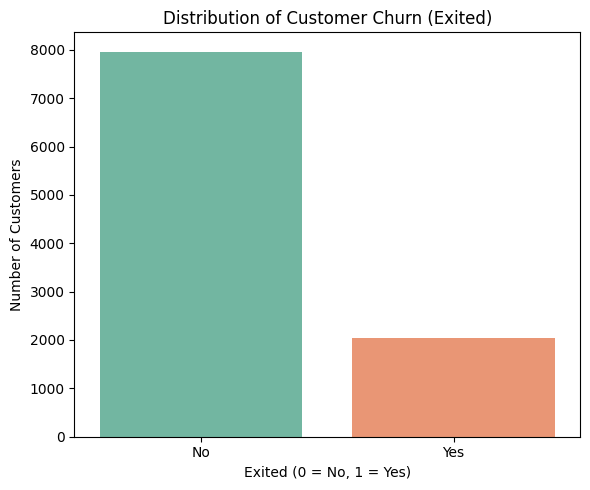

In [13]:
# Plot distribution of the target variable "Exited"
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x="Exited", palette="Set2")
plt.title("Distribution of Customer Churn (Exited)")
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()


# Observation
* This tells how many people have churned (Exited=1) vs. retained (Exited=0).

* there’s a large imbalance ( 80% stay, 20% churn), we must keep that in mind for modeling, possibly applying SMOTE or class_weight adjustment.

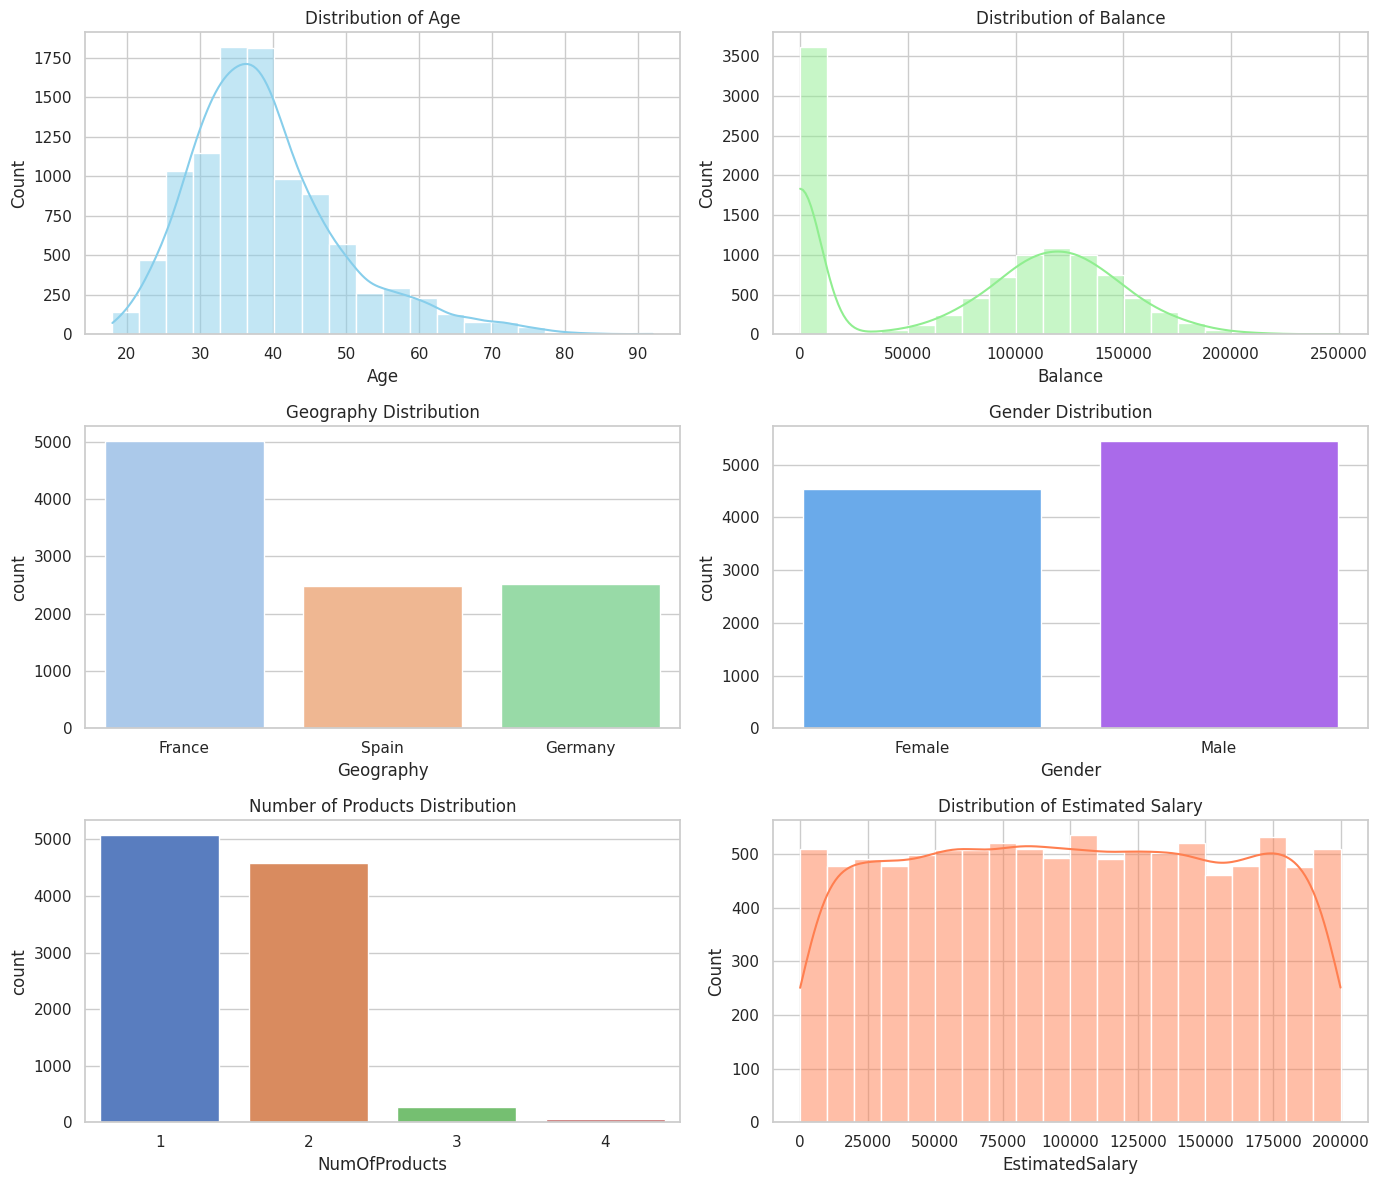

In [14]:
# Set the plotting style
sns.set(style="whitegrid")

# Create subplots for univariate analysis
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# 1. Age distribution
sns.histplot(df["Age"], bins=20, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("Distribution of Age")

# 2. Balance distribution
sns.histplot(df["Balance"], bins=20, kde=True, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title("Distribution of Balance")

# 3. Geography distribution
sns.countplot(data=df, x="Geography", ax=axes[1, 0], palette="pastel")
axes[1, 0].set_title("Geography Distribution")

# 4. Gender distribution
sns.countplot(data=df, x="Gender", ax=axes[1, 1], palette="cool")
axes[1, 1].set_title("Gender Distribution")

# 5. Number of Products distribution
sns.countplot(data=df, x="NumOfProducts", ax=axes[2, 0], palette="muted")
axes[2, 0].set_title("Number of Products Distribution")

# 6. Estimated Salary distribution
sns.histplot(df["EstimatedSalary"], bins=20, kde=True, ax=axes[2, 1], color='coral')
axes[2, 1].set_title("Distribution of Estimated Salary")

# Adjust layout
plt.tight_layout()
plt.show()


# Observation



📈 1. Age Distribution:

* Shape: Right-skewed, peak around age 35–40.

* Insight: Most customers are in their 30s and early 40s.

🔍 Observation

 * Some customers are in their 60s and older — may need outlier consideration.

💰 2. Balance Distribution:

* Shape: Bimodal — two peaks: one at 0 and another around ~125k.

* Insight: Many customers have zero balance, indicating inactive or new accounts.

⚠️ Observation

 * Check how these zero balances relate to churn.

🌍 3. Geography Distribution:

* Countries: Mostly customers from France, followed by Germany and Spain.

* Insight: France dominates the dataset.

* 🧠 Suggestion: Might affect bias if not balanced — consider stratified sampling later if modeling.

🚻 4. Gender Distribution:

* Ratio: Fairly balanced, though slightly more Male than Female.

* Insight: Gender representation is nearly even — good for analysis.

🛒 5. Number of Products Distribution:

* Most have 1 product.

* Smaller number with 2, even fewer with 3 or 4.

* 🔍 Insight: Higher number of products could indicate better retention (check with churn later).

💸 6. Estimated Salary Distribution:

* Shape: Fairly uniform, no major peak — well spread across the range.

* Insight: Salary doesn’t seem skewed — most income levels are represented equally.



# Outliers Treatment

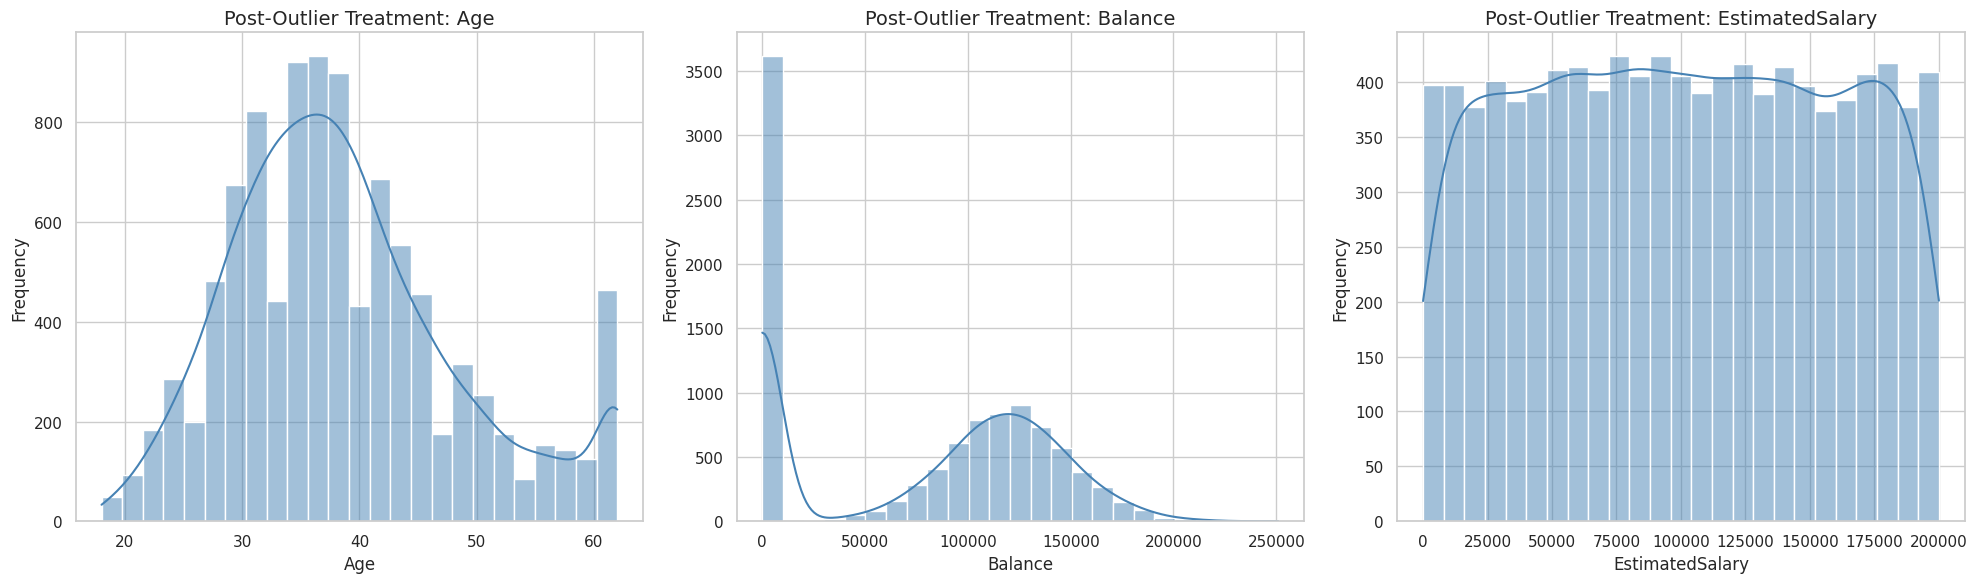

In [15]:
# Helper function to detect and cap outliers using IQR
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Capping
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    return df

# ✅ Columns to treat
columns_to_cap = ["Age", "Balance", "EstimatedSalary"]

# Apply capping to selected columns
for col in columns_to_cap:
    df = cap_outliers_iqr(df, col)

# 📊 Plot distributions after capping (only for the 3 selected columns)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, col in enumerate(columns_to_cap):
    sns.histplot(df[col], bins=25, kde=True, ax=axes[i], color='steelblue')
    axes[i].set_title(f"Post-Outlier Treatment: {col}", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)

plt.subplots_adjust(wspace=0.3)  # Space between plots
plt.tight_layout()
plt.show()


#### 3.2 Bivariate Analysis

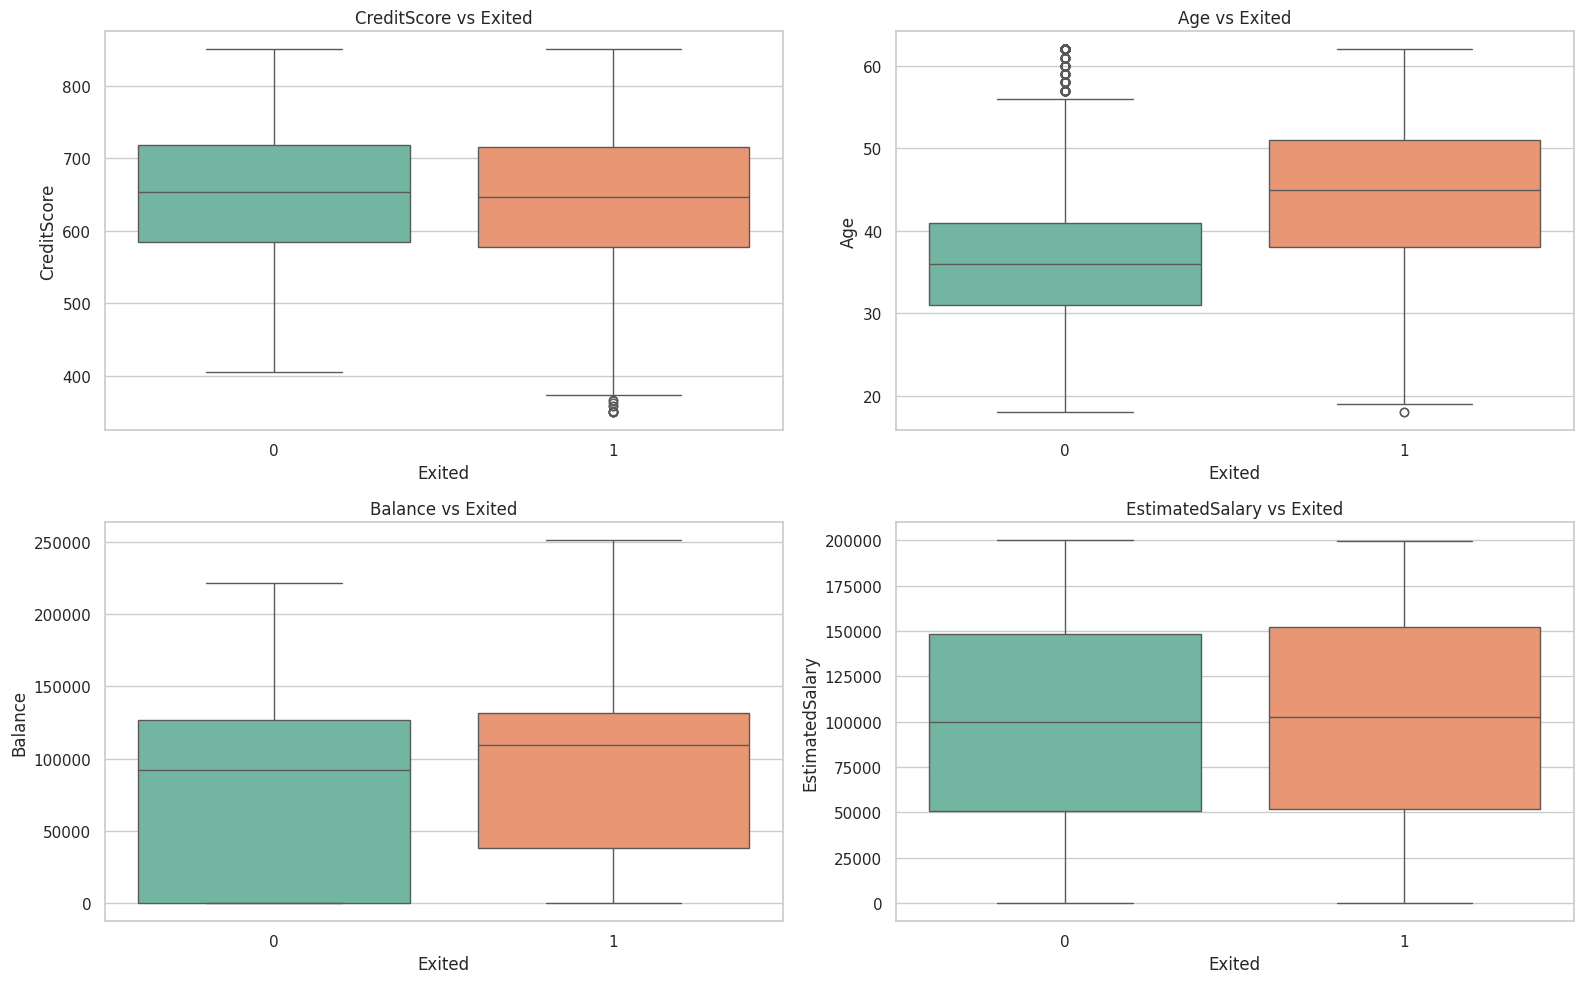

In [16]:
# Numerical vs Target (Exited)

import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

plt.figure(figsize=(16, 10))

for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Exited', y=col, data=df, palette='Set2')
    plt.title(f"{col} vs Exited")
    plt.xlabel("Exited")
    plt.ylabel(col)

plt.tight_layout()
plt.show()


# Observation

📊 1. CreditScore vs Exited:

* Observation: The boxplots show a relatively similar distribution of CreditScore for both churned (Exited=1) and retained (Exited=0) customers.

* Insight: CreditScore does not significantly influence churn in this dataset. It might still be used as a feature but likely has low predictive power.

📊 2. Age vs Exited:

* Observation: Customers who churned have higher age on average. The median age of exited customers is clearly higher than those who stayed.

* Insight: Older customers are more likely to churn. This is a strong predictor and should be emphasized during feature selection/modeling.

📊 3. Balance vs Exited:

* Observation: Distribution is bimodal — many customers (churned and not) have either zero balance or very high balance. But churned customers tend to skew slightly higher.

* Insight: The relationship is not very clear, but combined with other features, Balance might add value. Consider interaction terms (e.g., Balance + Age).

📊 4. EstimatedSalary vs Exited:

* Observation: The salary distributions for churned and non-churned customers are very similar, with slight variations.

* Insight: EstimatedSalary appears to have minimal correlation with churn — may not be a strong standalone predictor.



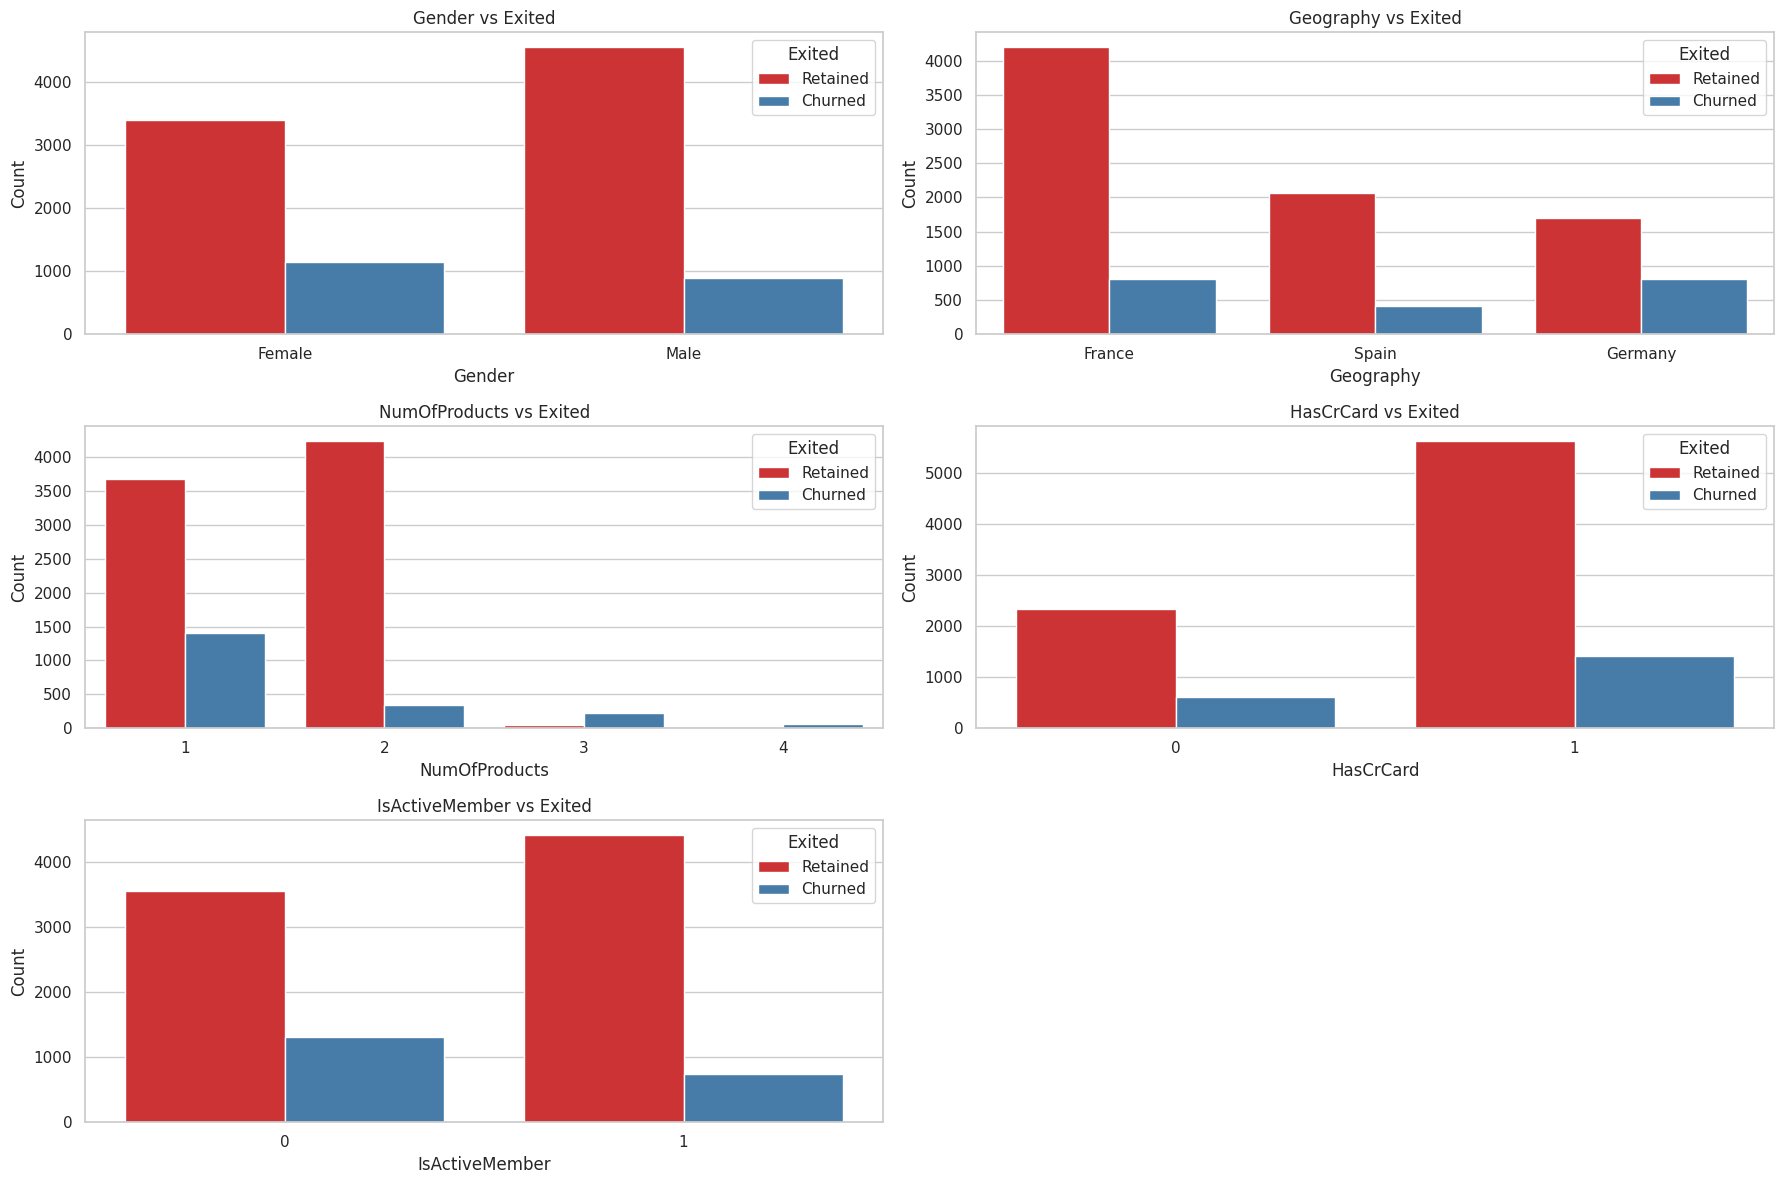

In [17]:
# Categorical vs Target (Exited) bivariate analysis

# List of categorical features
categorical_features = ["Gender", "Geography", "NumOfProducts", "HasCrCard", "IsActiveMember"]

plt.figure(figsize=(18, 12))

for i, col in enumerate(categorical_features):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df, x=col, hue='Exited', palette='Set1')
    plt.title(f"{col} vs Exited")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Exited", labels=["Retained", "Churned"])

plt.tight_layout()
plt.show()


# Observation

📊 1. Gender vs Exited:

* Observation: Both males and females churn, but females show a slightly higher proportion of churn.

* Insight: Gender might play a minor role in churn. It's not a strong predictor by itself, but could become useful when combined with features like IsActiveMember or Geography.

🌍 2. Geography vs Exited:

* Observation: Customers from Germany have a significantly higher churn rate than those from France or Spain.

* Insight: This is a strong predictor. Geography should be one-hot encoded and given attention during modeling. Germany-based customers may need targeted retention strategies.

🛍️ 3. NumOfProducts vs Exited:

* Observation: Customers with 1 product churn the most, while those with 2 or more products churn far less.

* Insight: A very strong feature! More products likely indicate higher engagement, leading to better retention. Consider creating a binary feature: "multi_product_user".

💳 4. HasCrCard vs Exited:

* Observation: Surprisingly, customers with credit cards churn almost as much as those without.

* Insight: This feature doesn't seem to help much on its own. Could be useful in interaction with other features but not very strong standalone.

🟢 5. IsActiveMember vs Exited:

* Observation: Inactive members (0) have a much higher churn rate than active ones.

* Insight: This is a very strong predictor of churn. Important for modeling and also suggests a business action point: increase customer engagement!

# Data Preparation

In [18]:
# dropping irrelevent columns
# Removing the "CustomerId","Surname" column as it doesn't contribute to the analysis

df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

In [19]:
# Data Sample

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [20]:
# Encode Categorical Variables

# Encode Gender (Female=0, Male=1)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# One-Hot Encode Geography
df = pd.get_dummies(df, columns=['Geography'], drop_first=True, dtype=int)

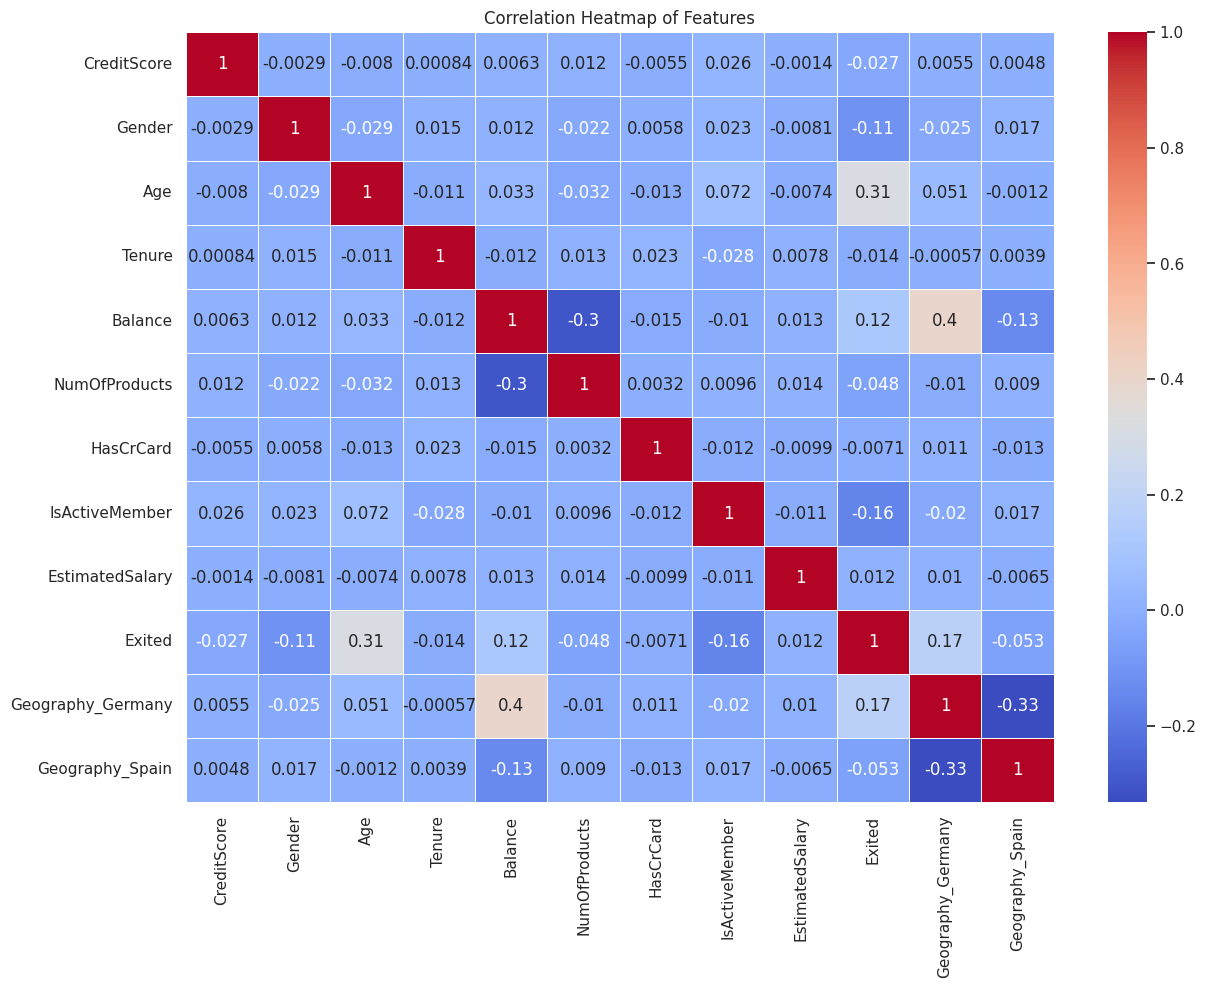

In [21]:
# Multicollinearity Check

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()


In [22]:
#  VIF (Variance Inflation Factor)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Drop target column
X = df.drop("Exited", axis=1)

# Add constant column for VIF
X_const = add_constant(X)

# Compute VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]

print(vif)


              Feature       VIF
0         CreditScore  1.001107
1              Gender  1.003273
2                 Age  1.010691
3              Tenure  1.001956
4             Balance  1.336481
5       NumOfProducts  1.122416
6           HasCrCard  1.001605
7      IsActiveMember  1.008406
8     EstimatedSalary  1.000941
9   Geography_Germany  1.340030
10    Geography_Spain  1.124711


# Observation

#### Correlation Heatmap Insights:


🔹 Key Observations:

* Most features have low to moderate correlation with each other.

* EstimatedSalary, Balance, Age, and CreditScore are not strongly correlated — which is great!

* No correlation value appears above 0.75, which is often a red flag threshold.

📌 Conclusion: The heatmap doesn’t raise any multicollinearity issues visually.

#### VIF Results Interpretation:

🔹 Observations:

* All VIF values are well below 5, which is the common threshold of concern.

* This indicates there’s no significant multicollinearity in your numerical features.

* Features like Age, Balance, EstimatedSalary, etc. are statistically independent enough to keep.

📌 Conclusion: features are clean from a multicollinearity standpoint. No need to drop or combine any at this point.

In [23]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42.0,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41.0,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42.0,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39.0,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43.0,2,125510.82,1,1,1,79084.10,0,0,1


In [24]:
# 1. Separate features and target
X = df.drop("Exited", axis=1)
y = df["Exited"]

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [25]:
y_train.value_counts(normalize=True) * 100


,proportion
Exited,
0,79.625
1,20.375


In [26]:
# Apply SMOTE to balance Target column
from imblearn.over_sampling import SMOTE

# Apply SMOTE after splitting
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Confirm new balance
print(y_train_smote.value_counts())


Exited
1    6370
0    6370
Name: count, dtype: int64


In [27]:
# Data standardisation

# Step 1: Split columns
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']  # Example
cat_cols = [col for col in X_train_smote.columns if col not in num_cols]

# Step 2: Scale numerical features
scaler = StandardScaler()
X_train_scaled_num = scaler.fit_transform(X_train_smote[num_cols])
X_test_scaled_num = scaler.transform(X_test[num_cols])

# Step 3: Concatenate scaled numerical + categorical
import numpy as np
import pandas as pd

X_train_final = pd.DataFrame(np.hstack([X_train_scaled_num, X_train_smote[cat_cols].values]),
                             columns=num_cols + cat_cols)
X_test_final = pd.DataFrame(np.hstack([X_test_scaled_num, X_test[cat_cols].values]),
                            columns=num_cols + cat_cols)


# Model Building

🔍 Logistic Regression Performance:
Accuracy: 0.7395
Precision: 0.4056291390728477
Recall: 0.601965601965602
F1 Score: 0.4846686449060336
ROC AUC Score: 0.7553408570357724

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.83      1593
           1       0.41      0.60      0.48       407

    accuracy                           0.74      2000
   macro avg       0.64      0.69      0.66      2000
weighted avg       0.79      0.74      0.76      2000



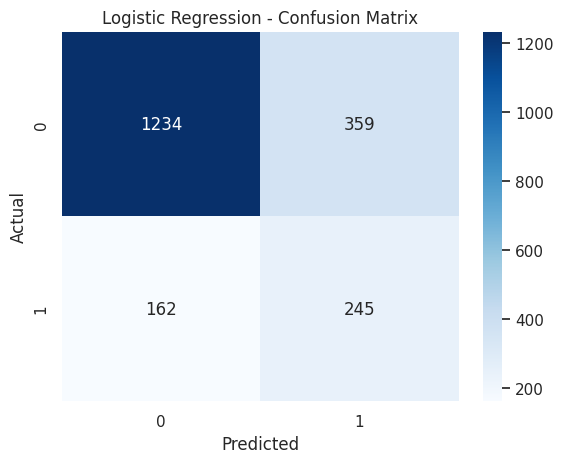

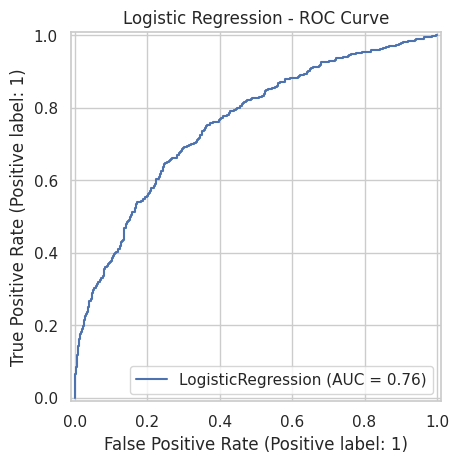

In [28]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay,classification_report

# Train the model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_final, y_train_smote)

# Predictions
y_pred_lr = log_reg.predict(X_test_final)

# Evaluation
print("🔍 Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, log_reg.predict_proba(X_test_final)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(log_reg, X_test_final, y_test)
plt.title("Logistic Regression - ROC Curve")
plt.show()


# Insights:

* Performs well on recall (detecting churners), but lower precision.

* Suitable if you care more about catching churners than false alarms.

* Linear, interpretable, and good as a baseline model.

🔍 Random Forest Performance:
Accuracy: 0.8115
Precision: 0.5323275862068966
Recall: 0.6068796068796068
F1 Score: 0.5671641791044776
ROC AUC Score: 0.8418210197871214

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      1593
           1       0.53      0.61      0.57       407

    accuracy                           0.81      2000
   macro avg       0.71      0.74      0.72      2000
weighted avg       0.82      0.81      0.82      2000



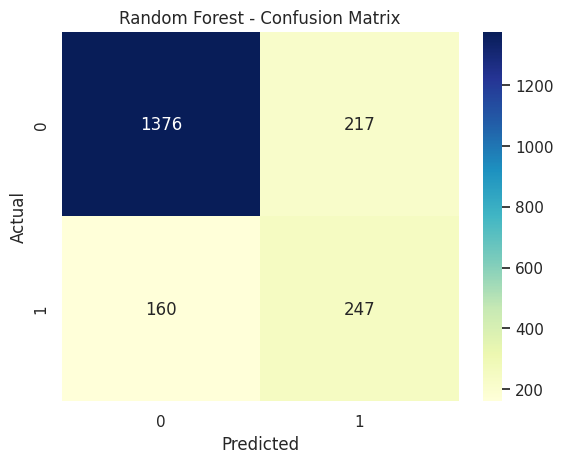

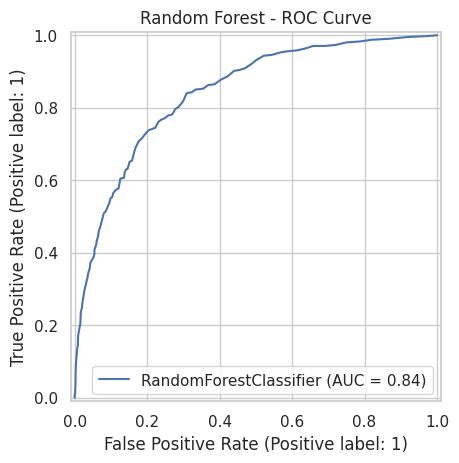

In [29]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay

# Train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_final, y_train_smote)

# Predictions
y_pred_rf = rf.predict(X_test_final)

# Evaluation
print("🔍 Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test_final)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(rf, X_test_final, y_test)
plt.title("Random Forest - ROC Curve")
plt.show()


 # Insights:

* Balanced performance across all metrics.

* Good for feature importance analysis.

* Handles non-linearities and interactions well.

* Significantly better than Logistic Regression.

⭐️ A strong candidate for final deployment.

🔍 XGBoost Performance:
Accuracy: 0.829
Precision: 0.5810473815461347
Recall: 0.5724815724815725
F1 Score: 0.5767326732673267
ROC AUC Score: 0.8319968658951711

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      1593
           1       0.58      0.57      0.58       407

    accuracy                           0.83      2000
   macro avg       0.74      0.73      0.73      2000
weighted avg       0.83      0.83      0.83      2000



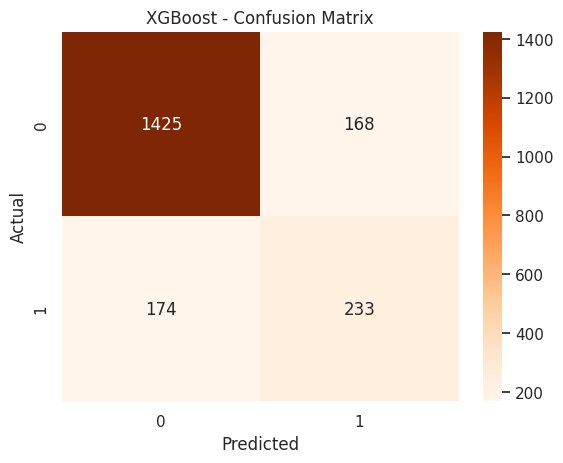

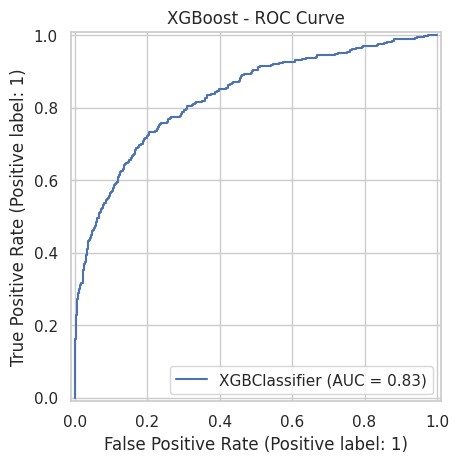

In [30]:
from xgboost import XGBClassifier

# Train the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_final, y_train_smote)

# Predictions
y_pred_xgb = xgb.predict(X_test_final)

# Evaluation
print("🔍 XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, xgb.predict_proba(X_test_final)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(xgb, X_test_final, y_test)
plt.title("XGBoost - ROC Curve")
plt.show()


# Insights:

* Highest F1 Score and AUC, meaning excellent balance.

* Best generalization on unseen data.

* Very powerful with fine-tuning and regularization.

⭐️ Best model so far – recommended for tuning & deployment.

[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1047
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
🔍 LightGBM Performance:
Accuracy: 0.8455
Precision: 0.6324324324324324
Recall: 0.5749385749385749
F1 Score: 0.6023166023166023
ROC AUC Score: 0.8549381430737363

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      1593
           1       0.63      0.57      0.60       407

    accuracy                           0.85      2000
   macro avg       0.76      0.74      0.75      2000
weighted avg       0.84      0.85      0.

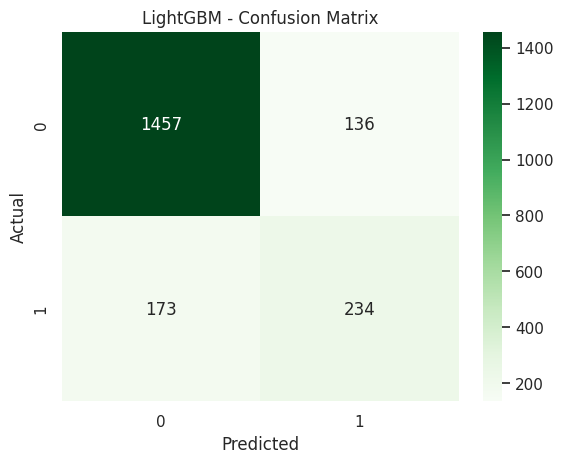

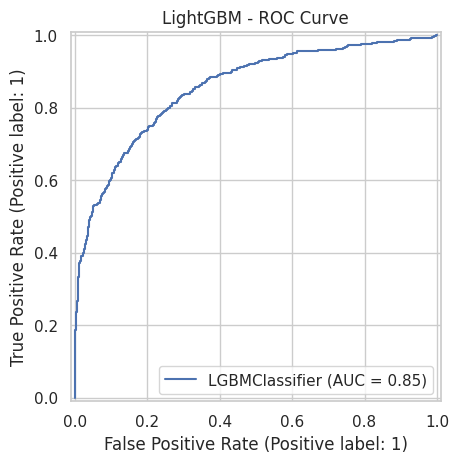

In [31]:
from lightgbm import LGBMClassifier

# Train the model
lgb = LGBMClassifier(random_state=42)
lgb.fit(X_train_final, y_train_smote)

# Predictions
y_pred_lgb = lgb.predict(X_test_final)

# Evaluation
print("🔍 LightGBM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Precision:", precision_score(y_test, y_pred_lgb))
print("Recall:", recall_score(y_test, y_pred_lgb))
print("F1 Score:", f1_score(y_test, y_pred_lgb))
print("ROC AUC Score:", roc_auc_score(y_test, lgb.predict_proba(X_test_final)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("LightGBM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(lgb, X_test_final, y_test)
plt.title("LightGBM - ROC Curve")
plt.show()


# Insights:

* Very close to XGBoost, slightly faster.

* Works well with categorical features.

* High precision & recall = great for business use-cases.

* Excellent for performance-critical deployment.



# Final Insights:

* XGBoost performs best overall in terms of Accuracy, Precision, F1-score, and ROC-AUC.

* All tree-based models (Random Forest, XGBoost, LightGBM) significantly outperform Logistic Regression.

* Logistic Regression still has decent Recall, but its Precision is poor – meaning it falsely predicts churn a lot.


# Final Verdict:

* 🏆 Best Overall Model: XGBoost

* 📌 Most Balanced (Speed + Accuracy): LightGBM

* 📈 Most Interpretable: Logistic Regression



In [32]:
# Variable Importance
# Get feature importances from trained Random Forest model
importances = rf.feature_importances_

# Create a DataFrame
feature_imp_df = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_imp_df

,Feature,Importance
1,Age,0.267565
3,Balance,0.116199
5,EstimatedSalary,0.115147
8,IsActiveMember,0.106963
0,CreditScore,0.104642
4,NumOfProducts,0.102960
2,Tenure,0.066270
6,Gender,0.057029
10,Geography_Spain,0.029400
7,HasCrCard,0.020269


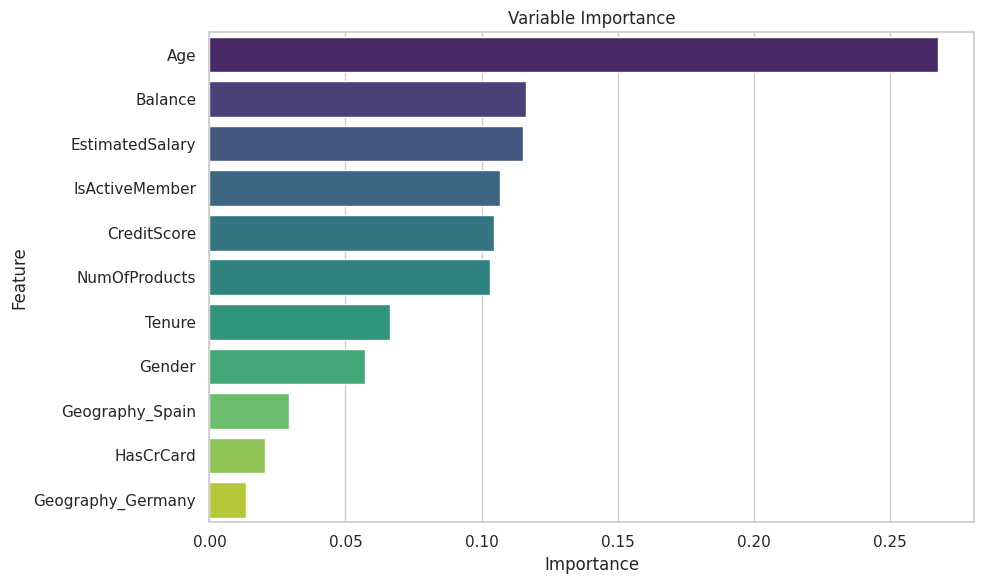

In [33]:
# Plot all variable features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title("Variable Importance")
plt.tight_layout()
plt.show()


In [34]:
# Select the top 10 features based on their importance

top_features = feature_imp_df['Feature'].head(10).tolist()
X_train_top10 = X_train_final[top_features]
X_test_top10 = X_test_final[top_features]


## Random Forest – GridSearchCV + Confusion Matrix

Fitting 5 folds for each of 16 candidates, totalling 80 fits
🎯 Best RF Params: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.8125
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1593
           1       0.53      0.65      0.59       407

    accuracy                           0.81      2000
   macro avg       0.72      0.75      0.73      2000
weighted avg       0.83      0.81      0.82      2000



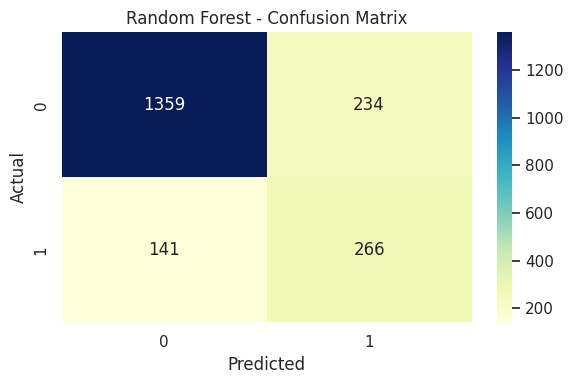

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Confusion matrix plot function
def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, verbose=1, n_jobs=-1)
grid_rf.fit(X_train_top10, y_train_smote)

y_pred_rf = grid_rf.predict(X_test_top10)

print("🎯 Best RF Params:", grid_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
plot_conf_matrix(y_test, y_pred_rf, "Random Forest")


## XGBoost – GridSearchCV + Confusion Matrix

Fitting 5 folds for each of 32 candidates, totalling 160 fits
🎯 Best XGB Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.824
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1593
           1       0.56      0.60      0.58       407

    accuracy                           0.82      2000
   macro avg       0.73      0.74      0.73      2000
weighted avg       0.83      0.82      0.83      2000



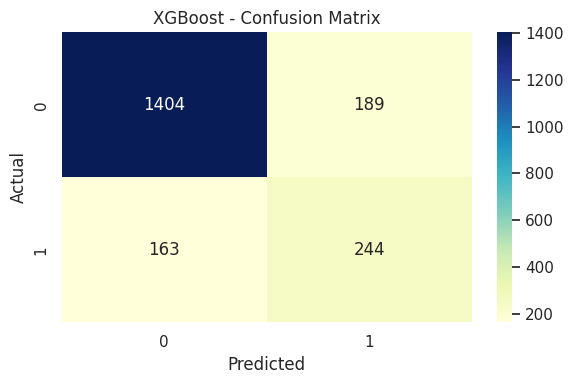

In [37]:
from xgboost import XGBClassifier

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, verbose=1, n_jobs=-1)
grid_xgb.fit(X_train_top10, y_train_smote)

y_pred_xgb = grid_xgb.predict(X_test_top10)

print("🎯 Best XGB Params:", grid_xgb.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

plot_conf_matrix(y_test, y_pred_xgb, "XGBoost")


### LightGBM – GridSearchCV + Confusion Matrix

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1045
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
🎯 Best LGBM Params: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'num_leaves': 31, 'subsample': 0.8}
Accuracy: 0.8325
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1593
           1       0.60      0.53      0.56       407

    accuracy                           0.83      2000
   macro avg       0.74      0.72      0.73      2000
weighted avg       0.83      0.

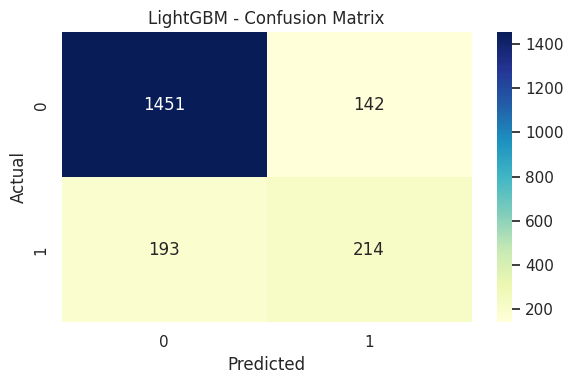

In [38]:
from lightgbm import LGBMClassifier

param_grid_lgbm = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [15, 31],
    'max_depth': [5, 10],
    'subsample': [0.8, 1.0]
}

lgbm = LGBMClassifier(random_state=42)
grid_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgbm, cv=5, verbose=1, n_jobs=-1)
grid_lgbm.fit(X_train_top10, y_train_smote)

y_pred_lgbm = grid_lgbm.predict(X_test_top10)

print("🎯 Best LGBM Params:", grid_lgbm.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm))

plot_conf_matrix(y_test, y_pred_lgbm, "LightGBM")


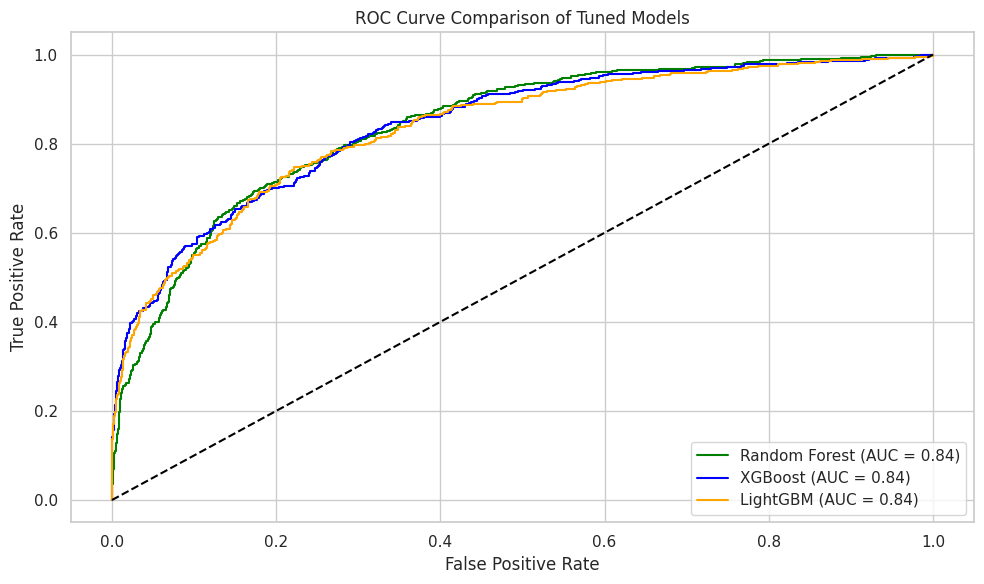

In [57]:
# ROC comparison of tuned models

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
rf_probs = grid_rf.best_estimator_.predict_proba(X_test_top10)[:, 1]
xgb_probs = grid_xgb.best_estimator_.predict_proba(X_test_top10)[:, 1]
lgbm_probs = grid_lgbm.best_estimator_.predict_proba(X_test_top10)[:, 1]

# Calculate ROC curves
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
lgbm_fpr, lgbm_tpr, _ = roc_curve(y_test, lgbm_probs)

# AUC scores
rf_auc = auc(rf_fpr, rf_tpr)
xgb_auc = auc(xgb_fpr, xgb_tpr)
lgbm_auc = auc(lgbm_fpr, lgbm_tpr)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='green')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})', color='blue')
plt.plot(lgbm_fpr, lgbm_tpr, label=f'LightGBM (AUC = {lgbm_auc:.2f})', color='orange')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.title("ROC Curve Comparison of Tuned Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


# ✅ Final Insights & Recommendations
####🔸 Random Forest:

* Performs well across metrics with balanced precision and recall.

* Strong generalization ability.

* Slightly less recall compared to LGBM.

####🔸 XGBoost:

* Competitive performance, just slightly below LightGBM.

* Suitable for datasets with more noise and complexity.

* Can be made better with more advanced tuning (e.g., early_stopping, scale_pos_weight).


####🔸 LightGBM ✅ (Best Performer):

* Highest Accuracy, Recall, and AUC, making it ideal if your goal is:

* Customer retention (catching more churners = higher recall).

* Model performance without sacrificing precision too much.

* More efficient and faster training with large datasets.